<a href="https://colab.research.google.com/github/OptimoCX/BootCampIA/blob/main/05_Redes_Convolucionales_Debora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Convolucionales (CNNs)

## Convolución:

- Definiciones:
  - La convolución es una operación matemática que combina dos funciones para producir una tercera función que representa cómo la forma de una es modificada por la otra. Describe cómo un sistema responde a un estímulo en función de su "historial" de respuestas.

  En palabras más sencillas:

  - La convolución es como pasar un filtro especial (kernel) sobre una imagen para resaltar detalles importantes (como bordes, manchas o formas), creando un "resumen" de dónde están esos detalles.
  - La convolución es: "buscar patrones repetidos" con un filtro móvil.


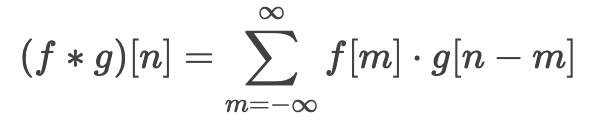

**Nota**: En una imagen, **f** sería los píxeles y **g** un kernel (como un filtro de desenfoque o detección de bordes)

## Kernel (Filtro):

El kernel es un patrón pequeño y aprendible que busca características específicas (como bordes o texturas) en una imagen

**¿Para qué sirve?**

- Un kernel puede aprender a detectar el trazo vertical de un "1" o la curva de un "3".

- Varios kernels combinados ayudan a la red neuronal a reconocer dígitos completos.

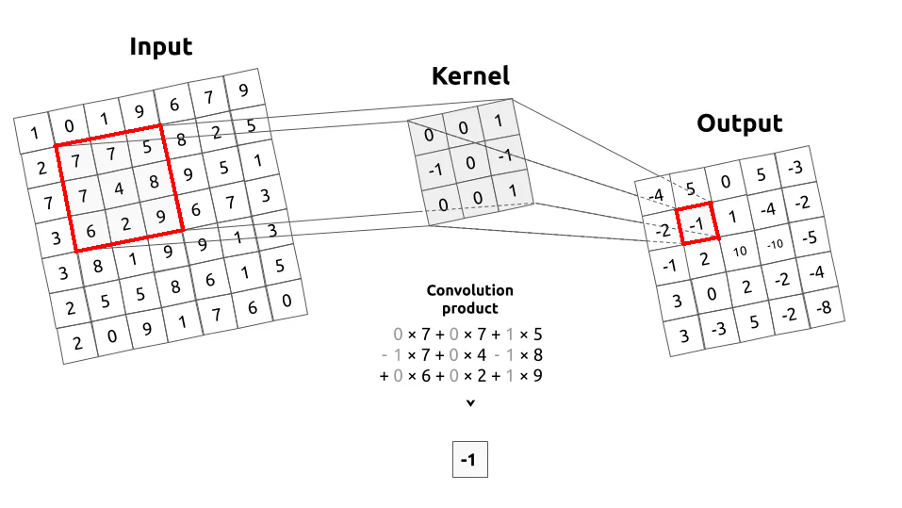

## Tipos de Kernels

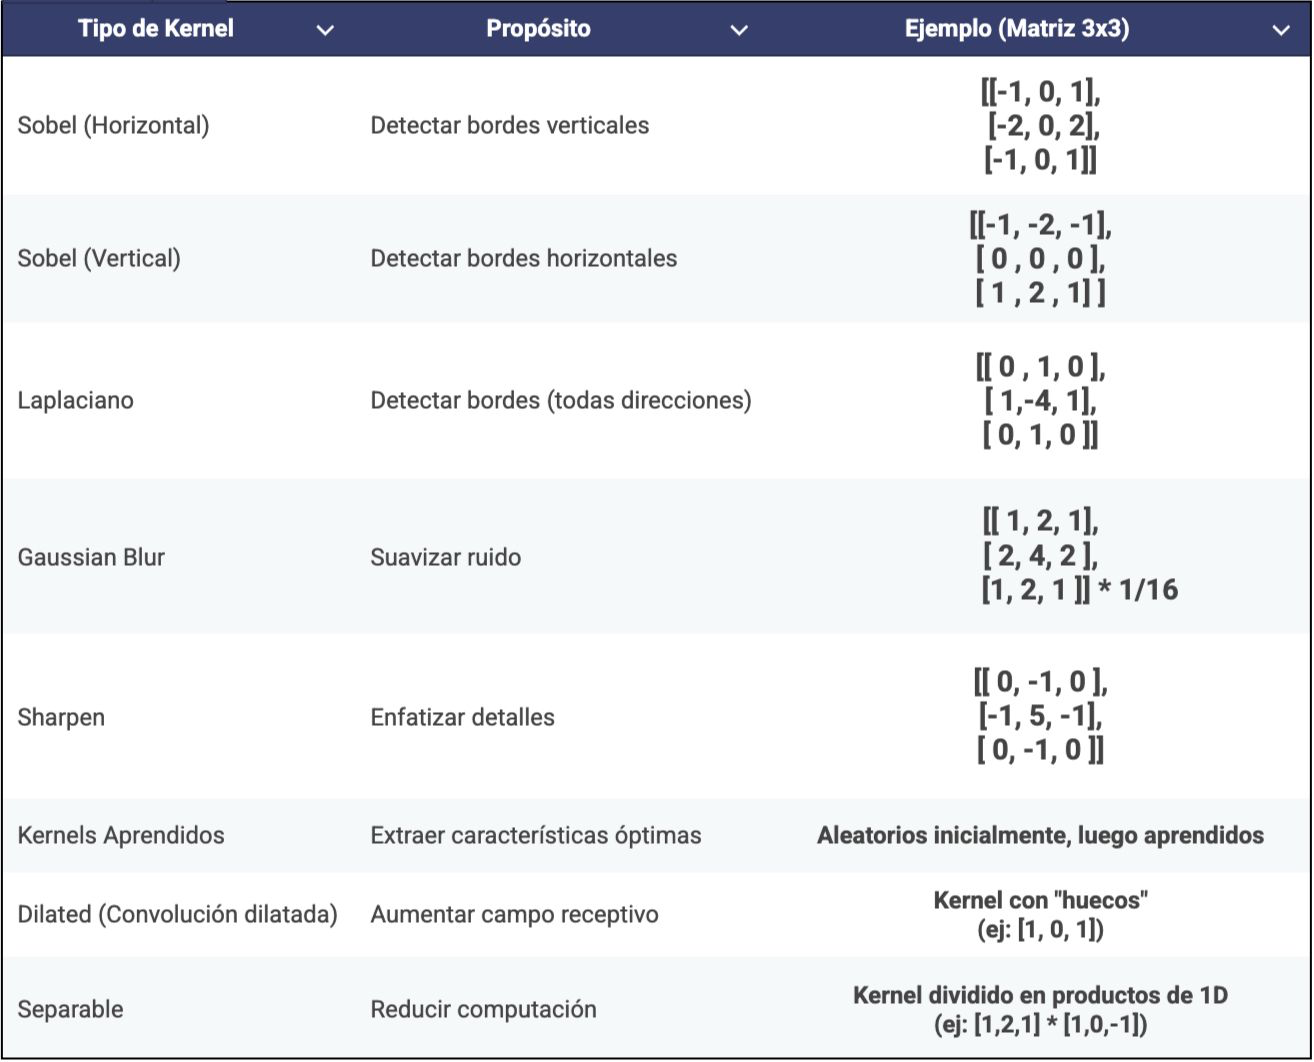

## Arquitectura Redes Convolucionales

Las redes neuronales convolucionales (CNNs o ConvNets) son un tipo especializado de redes neuronales diseñadas para procesar datos con estructura de cuadrícula, como imágenes. Su nombre proviene de la operación de "convolución" que aplican a los datos de entrada.

Las CNNs permiten:

- Detectar patrones locales (como bordes, texturas)

- Ser invariantes a la posición del patrón en la imagen

- Reducir la cantidad de parámetros en comparación con redes totalmente conectadas

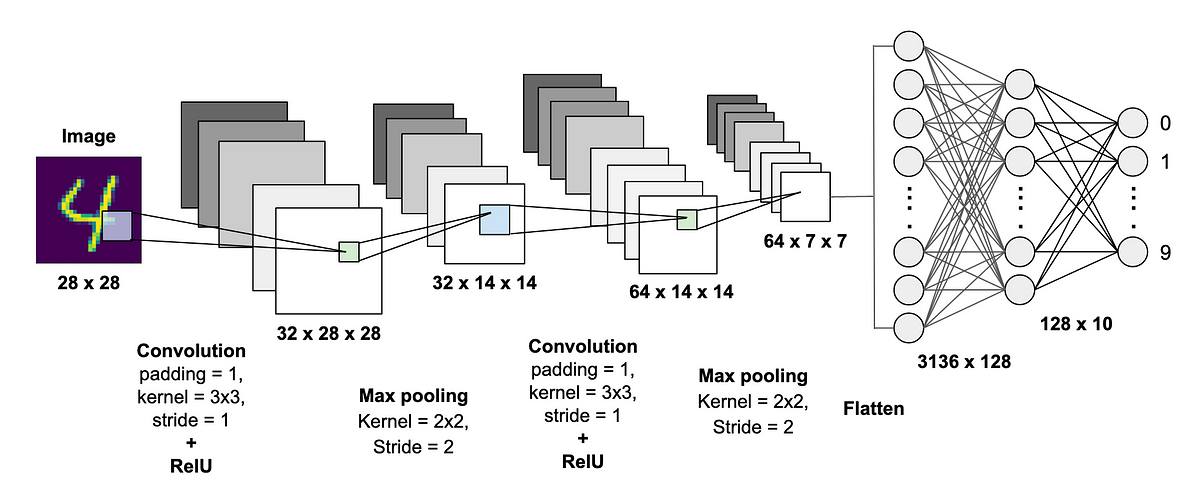

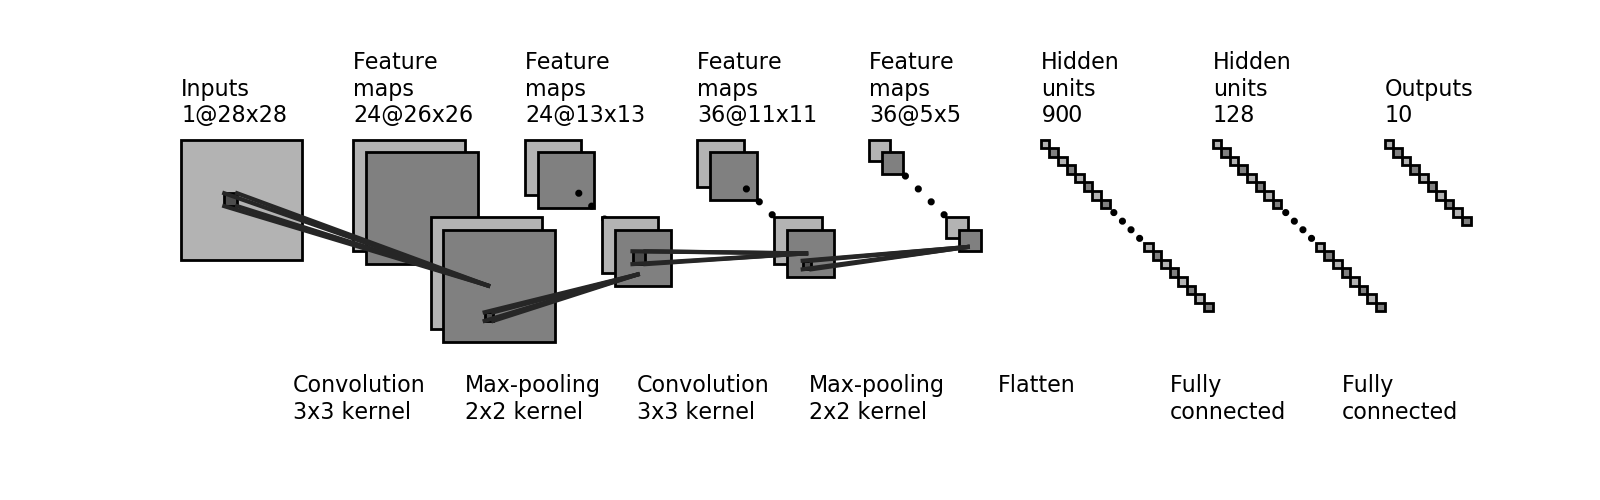

**1. Capa de Entrada**

- 28 x 28: La imagen de entrada tiene dimensiones 28x28 píxeles (tamaño estándar de MNIST) con 1 canal entrada (escala de grises).

**2. Primera Capa Convolucional**
- 32 x 28 x 28:

  - 32: Número de filtros/canales de salida

  - 28x28: Tamaño espacial (se mantiene igual que la entrada)

- Operaciones:

  - Convolución con kernel 3x3, padding=1 (borde), stride=1 (tamaño del paso)

  - Función de activación ReLU

  - El padding=1 mantiene las dimensiones espaciales

**3. Primera Capa de Max Pooling**
- Operación:

  - Max Pooling con kernel 2x2 y stride=2

  - Reduce las dimensiones espaciales a la mitad: 28x28 → 14x14

  - Número de canales se mantiene en 32

  - Salida: 32 x 14 x 14

**4. Segunda Capa Convolucional**
  - 64 x 14 x 14:

    - 64: Número de filtros/canales de salida

   - 14x14: Tamaño espacial (se mantiene igual)

- Operaciones:

  - Convolución con kernel 3x3, padding=1, stride=1

  - Función de activación ReLU

**5. Segunda Capa de Max Pooling**
- Operación:

  - Max Pooling con kernel 2x2 y stride=2

  - Reduce las dimensiones espaciales a la mitad: 14x14 → 7x7

  - Número de canales se mantiene en 64

  - Salida: 64 x 7 x 7

**6. Aplanamiento (Flatten)**
- Flatten: Convierte el tensor 3D (64x7x7) en un vector 1D de tamaño 3136 (64×7×7=3136)

**7. Capa Fully Connected (Densa)**
- 3136 x 128: Capa densa que conecta las 3136 entradas con 128 neuronas

**8. Capa de Salida**
- 128 x 10: Capa densa final que conecta las 128 neuronas con 10 salidas (una por cada dígito del 0 al 9)

## Feature Map (Mapa de Características)

Es una representación visual o espacial de las características extraídas de una imagen (u otro dato de entrada) en una capa específica de la red

**¿Qué representa?**

- Cada feature map destaca patrones o atributos detectados en la imagen, como bordes, texturas, formas o incluso objetos complejos en capas más profundas.

- Es el resultado de aplicar filtros convolucionales (kernels) a la entrada o a los feature maps de la capa anterior.



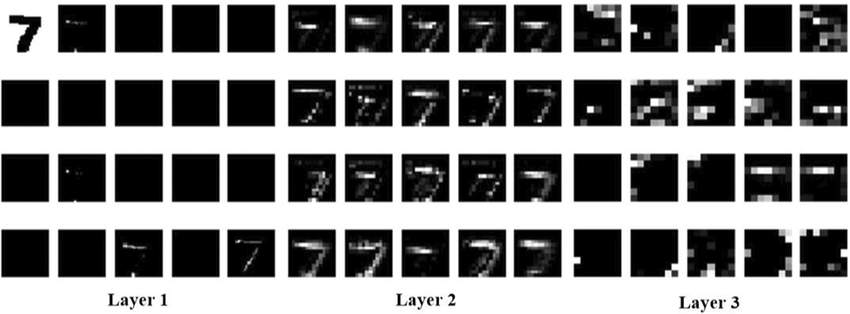

## Diferencias canales de entrada vs canales de salida

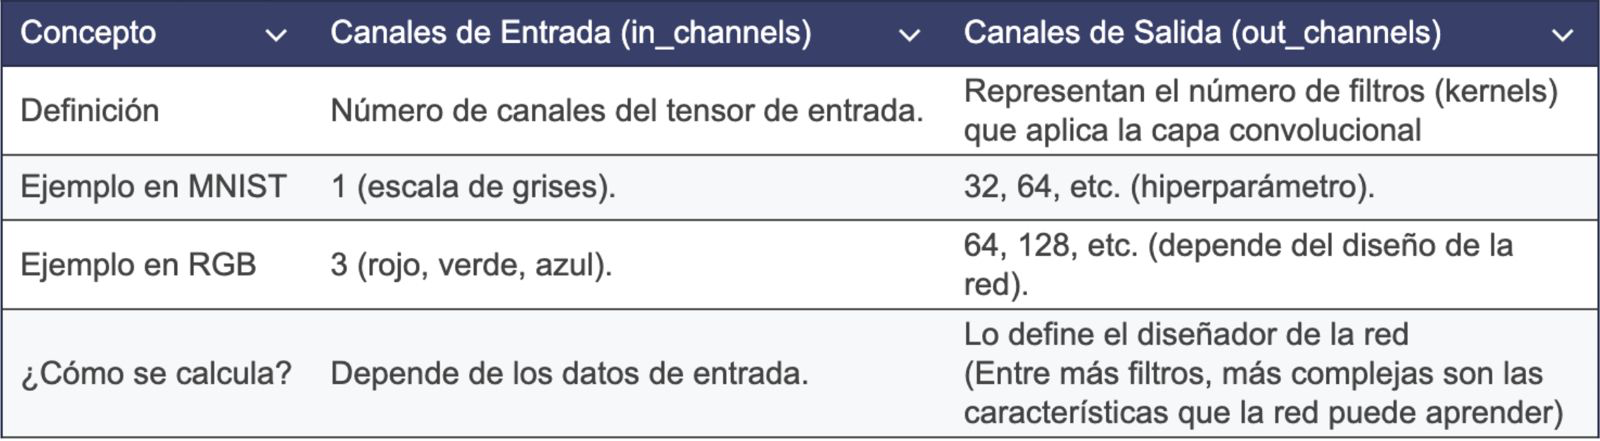

## Max Pooling

El Max Pooling es una operación de reducción de dimensionalidad para disminuir el tamaño espacial (ancho y alto) de los mapas de características, conservando la información más relevante

**¿Por qué se usa Max Pooling?**

- Reduce la complejidad computacional: Disminuye el tamaño de los datos, acelerando el entrenamiento.

- Controla el overfitting: Al resumir la información, evita memorizar detalles irrelevantes.

- Mantiene características dominantes: Conserva los patrones más activos (ej: bordes, texturas).

- Proporciona invarianza a pequeñas traslaciones: Pequeños cambios en la posición de un objeto no afectan su detección.

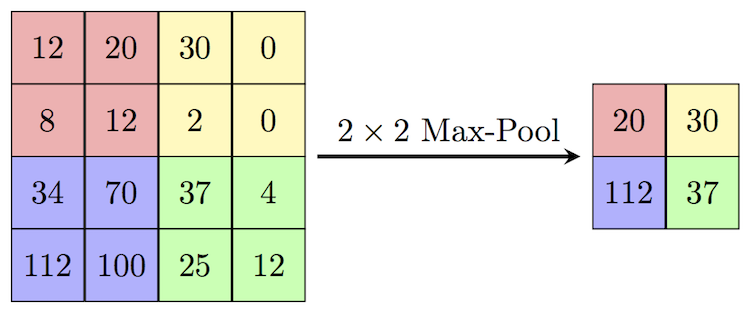

## Stride (Paso)

El stride es un parámetro que define cuánto se desplaza el filtro (kernel) sobre la imagen o mapa de características durante la convolución.

  - Stride = 1: El filtro se mueve de 1 en 1 píxel (paso pequeño, genera un mapa de salida más grande).

  - Stride = 2: El filtro salta 2 píxeles cada vez (paso más grande, reduce las dimensiones del mapa de salida).

## Flatten

La capa Flatten se utiliza para aplanar los datos multidimensionales (como los feature maps de una capa convolucional) en un vector unidimensional, permitiendo que puedan ser procesados por capas densas (fully connected) en la red

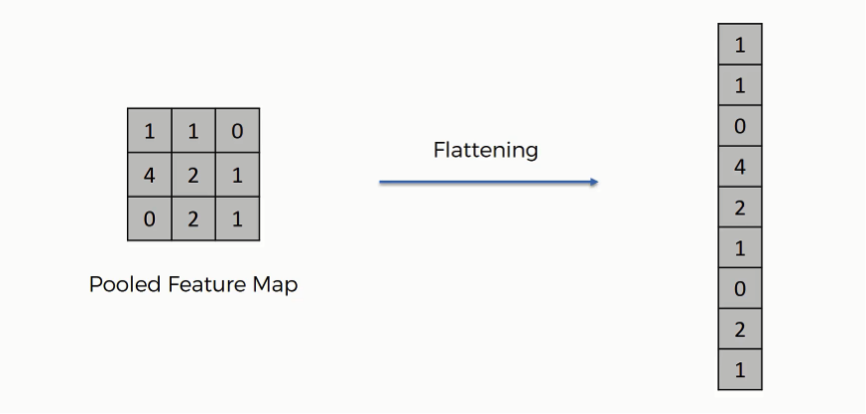

## Conjunto de Datos MNIST
MNIST es un conjunto de datos clásico que contiene imágenes de dígitos escritos a mano (0-9) en escala de grises de 28x28 píxeles.

- 60,000 imágenes de entrenamiento

- 10,000 imágenes de prueba

- Cada imagen está etiquetada con el dígito que representa

https://www.kaggle.com/datasets/hojjatk/mnist-dataset/data

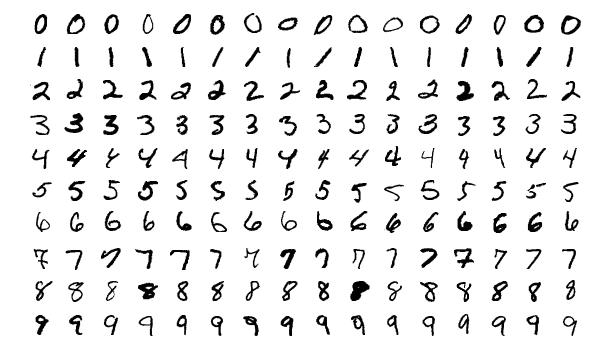

## 1. Importar Líbrerías

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

## 2. Cargar Dataset MNIST

In [ ]:
# Cargar los datos
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Verificar las dimensiones
print("Forma de las imágenes de entrenamiento:", train_images.shape)
print("Forma de las etiquetas de entrenamiento:", train_labels.shape)
print("Forma de las imágenes de prueba:", test_images.shape)
print("Forma de las etiquetas de prueba:", test_labels.shape)

**Viasualización de Datos**

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(np.argmax(train_labels[i]))
plt.show()

## 3. Preprocesamiento de Datos

In [ ]:
# Normalizar los valores de píxeles al rango [0, 1]
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Reformatear las imágenes para incluir un canal (escala de grises)
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Convertir las etiquetas a one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## 4. Construcción del Modelo CNN (Arquitectura)

In [ ]:
model = models.Sequential([
    # Capa convolucional 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # Capa convolucional 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Capa convolucional 3
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Aplanar para la capa densa
    layers.Flatten(),

    # Capas densas
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Resumen del modelo
model.summary()

Explicación de las capas:

- Capa 1: Conv2D(32, (3,3)): 32 filtros de 3x3 que detectan características locales

- MaxPooling2D((2,2)): Reduce las dimensiones espaciales a la mitad

- Capa 2: Conv2D(64, (3,3)): 64 filtros de 3x3 para detectar características más complejas

- MaxPooling2D((2,2)): Otra reducción de dimensionalidad

- Capa 3: Conv2D(64, (3,3)): Más filtros para características de alto nivel

- Flatten(): Convierte los mapas de características 3D a 1D para capas densas

- Dense(64): Capa oculta totalmente conectada

- Dense(10): Capa de salida con 10 neuronas (una por dígito)

## 5. Compilación del Modelo

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

- Optimizador: Adam (variante de descenso de gradiente)

- Función de pérdida: Entropía cruzada categórica (adecuada para clasificación)

- Métrica: Precisión (porcentaje de clasificaciones correctas)

## 6. Entrenamiento del Modelo

In [ ]:
history = model.fit(train_images, train_labels,
                    epochs=10,
                    batch_size=64,
                    validation_data=(test_images, test_labels))

## 7. Evaluación del Modelo

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nPrecisión en datos de prueba: {test_acc:.4f}')

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

## 8. Predicciones y Visualización de Resultados

In [ ]:
predictions = model.predict(test_images)

# Mostrar algunas predicciones
plt.figure(figsize=(15, 15))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(test_labels[i])
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f'Pred: {predicted_label} (Real: {true_label})', color=color)
plt.show()